**DESCRIPTION**

Identify the level of income qualification needed for the families in Latin America.

**Problem Statement Scenario:**

Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to
classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.

**Following actions should be performed:**

1. Identify the output variable.
2. Understand the type of data.
3. Check if there are any biases in your dataset.
4. Check whether all members of the house have the same poverty level.
5. Check if there is a house without a family head.
6. Set poverty level of the members and the head of the house within a family.
7. Count how many null values are existing in columns.
8. Remove null value rows of the target variable.
9. Predict the accuracy using random forest classifier.
10. Check the accuracy using random forest with cross validation.

In [1]:
#Import Libraries requerd for solution
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing data
iq_train = pd.read_csv("train_iq.csv", index_col=0)
iq_test = pd.read_csv("test_iq.csv", index_col=0)
iq_train.shape, iq_test.shape

((9557, 142), (23856, 141))

## Task1: Identify the output variable

As we can see that there are 142 attributes(columns) in train dataset and 141 attribute in test dataset. So lets take a look at the columns and identify output variable

In [3]:
print("Train dataset Columns:\n\n",iq_train.columns)
print("-----------------------------------------------------------------------------------------------------------------------")
print("Test dataset Columns:\n\n",iq_test.columns)

Train dataset Columns:

 Index(['v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1',
       'r4h1', 'r4h2',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=142)
-----------------------------------------------------------------------------------------------------------------------
Test dataset Columns:

 Index(['v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1',
       'r4h1', 'r4h2',
       ...
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned',
       'agesq'],
      dtype='object', length=141)


**Observations:**

<I>As we compare columns of both the "test" and "train" data set it is clearly visible that the "train" dataset contains a column named "Target" which is most probably the output column  </I>

**Hence we can say that <I><b>"Target"</b></I>  column in "train" dataset is the output variable and it identifies the income Qualification**

## Task 2: Understand the type of data

#### understanding data by performing EDA

In [4]:
#getting an overview of taining data
iq_train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
Id,,,,,,,,,,,,,,,,,,,,,
ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
#getting an overview of test data
iq_test.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
Id,,,,,,,,,,,,,,,,,,,,,
ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [6]:
#datatypes include in test and train datasets
print("Datatypes in train data:\n")
print(iq_train.dtypes.value_counts())
print("\n\nDatatypes in test data:\n")
print(iq_test.dtypes.value_counts())

Datatypes in train data:

int64      130
float64      8
object       4
dtype: int64


Datatypes in test data:

int64      129
float64      8
object       4
dtype: int64


In [7]:
#description of catagorical columns in train dataset
iq_train.describe(include = 'object')

,idhogar,dependency,edjefe,edjefa
count,9557,9557,9557,9557
unique,2988,31,22,22
top,fd8a6d014,yes,no,no
freq,13,2192,3762,6230


In [8]:
#description of catagorical columns in test dataset
iq_test.describe(include = 'object')

,idhogar,dependency,edjefe,edjefa
count,23856,23856,23856,23856
unique,7352,35,22,22
top,8e9159699,yes,no,no
freq,13,5388,9056,15845


 1. idhogar -> Household level identifier
 2. dependency -> Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
 3. edjefe -> years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
 4. edjefa -> years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

In [9]:
#Identify as house identifier (idhogar means businessman)
iq_train.idhogar.unique()

array(['21eb7fcc1', '0e5d7a658', '2c7317ea8', ..., 'a8eeafc29',
       '212db6f6c', 'd6c086aa3'], dtype=object)

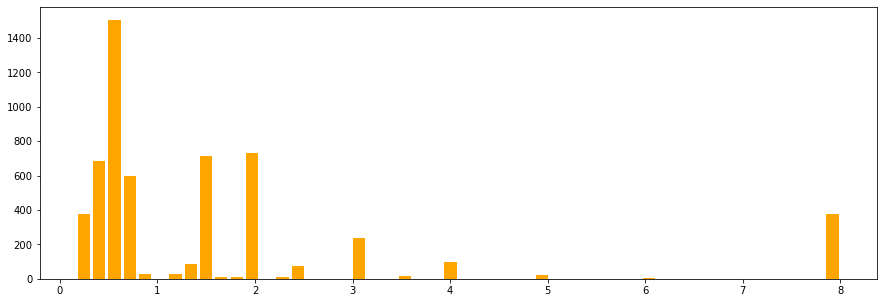

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
1.25           18
3.5            18
.80000001      18
2.25           13
.71428573      12
1.75           11
1.2            11
.83333331      11
.22222222      11
.2857143        9
1.6666666       8
.60000002       8
6               7
.16666667       7
Name: dependency, dtype: int64

In [10]:
# Preprocessing for the dependency columns :
data = iq_train.dependency

# Excluding the 'yes' and 'no' values to plot the remaining values
plt.figure(figsize=(15,5))
plt.hist(data[ data.isin(['no','yes']) == False ].astype('float'), rwidth=.8 , color=["Orange"] , bins=50)
plt.show()

data.value_counts()

**Changing yesy and no in below three columns**

1. dependency -> Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
2. edjefe -> years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
3. edjefa -> years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

**As we can see above thta for the attributes at 2 and 3 row the yes=1 and no=0. So, we will applu the same approach for depency**

In [11]:
# Decision : no = 0 & yes = 1, then convert all the other values to float in the 'dependency' column
iq_train.dependency = iq_train.dependency.replace('no',0).replace('yes',1).astype('float')
iq_test.dependency = iq_test.dependency.replace('no',0).replace('yes',1).astype('float')

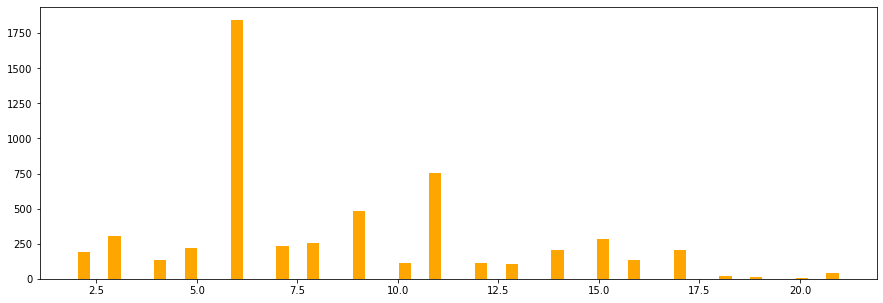

no     3762
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       137
16      134
yes     123
12      113
10      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64

In [12]:
# Preprocessing for the 'edjefe' columns (males years of education) :
data = iq_train.edjefe

# Excluding the 'yes' and 'no' values to plot the remaining values
plt.figure(figsize=(15,5))
plt.hist(data[ data.isin(['no','yes']) == False ].astype('float'), rwidth=.8 , color=["Orange"] , bins=50)
plt.show()

data.value_counts()

In [13]:
# Decision : no = 0 & yes = 1, then convert all the other values to float in the 'edjefe' column

# Find the median value by exclusing 'yes' & 'no'
iq_train.edjefe = iq_train.edjefe.replace('no',0).replace('yes',1).astype('float')
iq_test.edjefe = iq_test.edjefe.replace('no',0).replace('yes',1).astype('float')

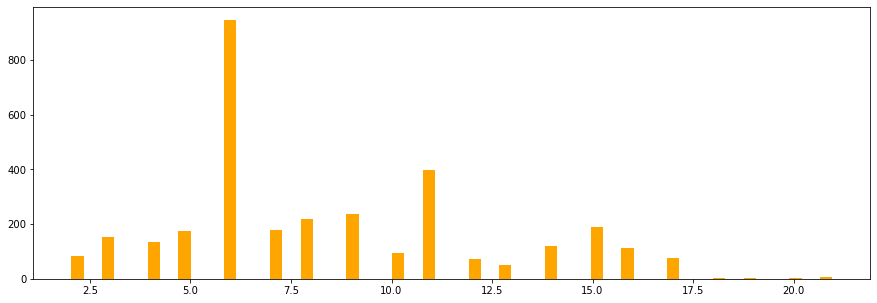

no     6230
6       947
11      399
9       237
8       217
15      188
7       179
5       176
3       152
4       136
14      120
16      113
10       96
2        84
17       76
12       72
yes      69
13       52
21        5
19        4
18        3
20        2
Name: edjefa, dtype: int64

In [14]:
# Preprocessing for 'edjefa' column (female years of education) :
data = iq_train.edjefa

# Excluding the 'yes' and 'no' values to plot the remaining values
plt.figure(figsize=(15,5))
plt.hist(data[ data.isin(['no','yes']) == False ].astype('float'), rwidth=.8 , color=["Orange"] , bins=50)
plt.show()

data.value_counts()

In [15]:
# Decision : no = 0 & yes = 1, then convert all the other values to float in the 'edjefa' column

# Find the median value by exclusing 'yes' & 'no'
iq_train.edjefa = iq_train.edjefa.replace('no',0).replace('yes',1).astype('float')
iq_test.edjefa = iq_test.edjefa.replace('no',0).replace('yes',1).astype('float')

**Handling the missing/Null values in the table**

In [16]:
# Checking for Missing Values in 'train' :
null_columns = iq_train.columns[iq_train.isnull().any()]
iq_train[null_columns].isnull().sum()

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [17]:
# Checking for Missing Values in 'test' :
null_columns = iq_test.columns[iq_test.isnull().any()]
iq_test[null_columns].isnull().sum()

v2a1         17403
v18q1        18126
rez_esc      19653
meaneduc        31
SQBmeaned       31
dtype: int64

**Observation:**

- Both test and train data contains same columns i.e. <i>"v2a1", "v18q1" , "rez_esc"</i> has lots of null values.

- There are two other columns i.e. <i>"meaneduc", "SQBmeaned"</i> we will handle these with median as the null values are very low.

  - <b><i>lest try our approach to handle missing values</i></b>

In [18]:
# Moderate Approach : If a column has 50% or more number of null values then we can drop that column
# otherwise, if it is less than 10% to 12% then we can go for Imputation

# Check the percentage (%) of null values in the above columns in the 'train'
# so that we can decide to go for either drop' or 'computation' 

print("Percentage of null values in `train['v2a1']` column : ", (iq_train['v2a1'].isnull().sum()/iq_train.shape[0]*100))
print("Percentage of null values in `train['v18q1']` column : ", (iq_train['v18q1'].isnull().sum()/iq_train.shape[0]*100))
print("Percentage of null values in `train['rez_esc']` column : ", (iq_train['rez_esc'].isnull().sum()/iq_train.shape[0]*100))
print("Percentage of null values in `train['rez_esc']` column : ", (iq_train['meaneduc'].isnull().sum()/iq_train.shape[0]*100))
print("Percentage of null values in `train['rez_esc']` column : ", (iq_train['SQBmeaned'].isnull().sum()/iq_train.shape[0]*100))

Percentage of null values in `train['v2a1']` column :  71.7798472323951
Percentage of null values in `train['v18q1']` column :  76.82327090091033
Percentage of null values in `train['rez_esc']` column :  82.95490216595167
Percentage of null values in `train['rez_esc']` column :  0.05231767290990897
Percentage of null values in `train['rez_esc']` column :  0.05231767290990897


In [19]:
# Moderate Approach : If a column has 50% or more number of null values then we can drop that column
# otherwise, if it is less than 10% to 12% then we can go for Imputation

# Check the percentage (%) of null values in the above columns in the 'test'
# so that we can decide to go for either drop' or 'computation' 

print("Percentage of null values in `test['v2a1']` column : ", (iq_test['v2a1'].isnull().sum()/iq_test.shape[0]*100))
print("Percentage of null values in `test['v18q1']` column : ", (iq_test['v18q1'].isnull().sum()/iq_test.shape[0]*100))
print("Percentage of null values in `test['rez_esc']` column : ", (iq_test['rez_esc'].isnull().sum()/iq_test.shape[0]*100))
print("Percentage of null values in `test['meaneduc']` column : ", (iq_test['meaneduc'].isnull().sum()/iq_test.shape[0]*100))
print("Percentage of null values in `test['SQBmeaned']` column : ", (iq_test['SQBmeaned'].isnull().sum()/iq_test.shape[0]*100))

Percentage of null values in `test['v2a1']` column :  72.95020120724345
Percentage of null values in `test['v18q1']` column :  75.98088531187123
Percentage of null values in `test['rez_esc']` column :  82.3817907444668
Percentage of null values in `test['meaneduc']` column :  0.12994634473507713
Percentage of null values in `test['SQBmeaned']` column :  0.12994634473507713


**We will drop 'v2a1','v18q1','rez_esc' columns from train and test data as these contain high percentage of null values**

**Lets take a look at each column one by one**

#### 1. v2a1: Monthly rent payment

- Let's look at v2a1: Monthly rent payment 
    - why the null values, Let's look at few rows with nulls in v2a1
    - Columns related to "v2a1: Monthly rent payment"
        - tipovivi1 =1 own and fully paid house
        - tipovivi2 =1 own, paying in installments"
        - tipovivi3 =1 rented
        - tipovivi4 =1 precarious 
        - tipovivi5 =1 other(assigned, borrowed)"

In [20]:
data = iq_train[iq_train['v2a1'].isnull()].head()

columns=['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
data[columns]

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
Id,,,,,
ID_68de51c94,1,0,0,0,0
ID_064b57869,1,0,0,0,0
ID_5c837d8a4,1,0,0,0,0
ID_e5cdba865,1,0,0,0,0
ID_e24d9c3c9,1,0,0,0,0


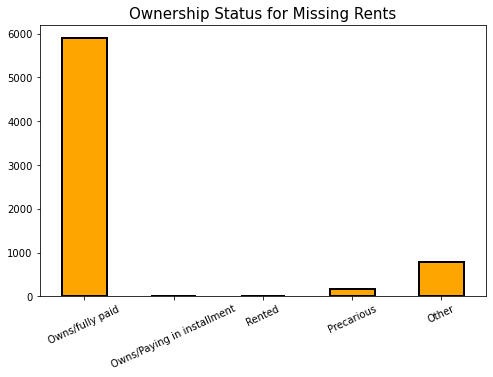

In [21]:
# Columns that indicates home ownership
own_columns = [x for x in iq_train if x.startswith('tipovivi')]

# Plot of the Ownership Status for Missing Rents
iq_train.loc[iq_train['v2a1'].isnull(), own_columns].sum().plot.bar(figsize = (8, 5), color = 'orange', edgecolor = 'k', linewidth = 2);
plt.xticks([0, 1, 2, 3, 4], ['Owns/fully paid', 'Owns/Paying in installment', 'Rented', 'Precarious', 'Other'], rotation = 25)
plt.title('Ownership Status for Missing Rents', size = 15);

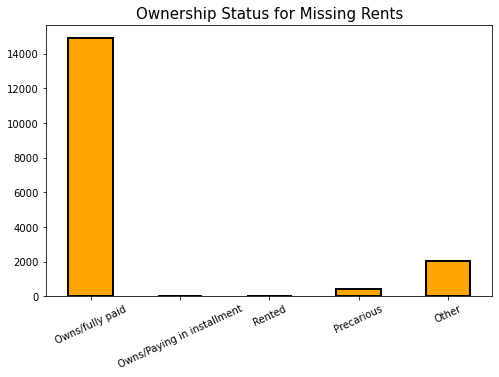

In [22]:
# Columns that indicates home ownership
own_columnst = [x for x in iq_test if x.startswith('tipovivi')]

# Plot of the Ownership Status for Missing Rents
iq_test.loc[iq_test['v2a1'].isnull(), own_columnst].sum().plot.bar(figsize = (8, 5), color = 'orange', edgecolor = 'k', linewidth = 2);
plt.xticks([0, 1, 2, 3, 4], ['Owns/fully paid', 'Owns/Paying in installment', 'Rented', 'Precarious', 'Other'], rotation = 25)
plt.title('Ownership Status for Missing Rents', size = 15);

**By looking at the abobe graphs it makes sense that when a person has full ownership, there will be no rent paid by person so we will fill null values with 0.**

In [23]:
#Lets add 0 for all the null values.
iq_train['v2a1'].fillna(value=0, inplace=True)
iq_test['v2a1'].fillna(value=0, inplace=True)
print("Null Values in train['v2a1'] : ",iq_train['v2a1'].isnull().sum())
print("Null Values in test['v2a1'] : ",iq_test['v2a1'].isnull().sum())

Null Values in train['v2a1'] :  0
Null Values in test['v2a1'] :  0


#### 2. v18q1: Monthly rent payment

- Let's look at v18q1: number of tablets household owns
    - why the null values, Let's look at few rows with nulls in v18q1
    - Columns related to "v2a1: number of tablets household owns"
        - v18q = owns a tablet

In [24]:
#lest check the unique values in v18q
print("unique values in train['v18q']:",iq_train["v18q"].unique())
print("unique values in test['v18q']:",iq_test["v18q"].unique())

unique values in train['v18q']: [0 1]
unique values in test['v18q']: [0 1]


- <b>Where 0 represents Houshold owns a tablet and 1 represents household doesnot owns a tablet</b>
    - Now take a looks where the null values exist in v18q1 

In [25]:
print("Train data set:\n")
print(iq_train.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum()))
print("----------------------------------------------------------------------------------------------------------------")
print("Test data set:\n")
print(iq_test.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum()))

Train data set:

v18q
0    7342
1       0
Name: v18q1, dtype: int64
----------------------------------------------------------------------------------------------------------------
Test data set:

v18q
0    18126
1        0
Name: v18q1, dtype: int64


**As we can clearly see that only columns where the household does not have any tablets the values are null so we can replace all the null values with zero which makes more sense**

In [26]:
#Let's add 0 for all the null values.
iq_train['v18q1'].fillna(value=0, inplace=True)
iq_test['v18q1'].fillna(value=0, inplace=True)
print("Null Values in train['v18q1'] : ",iq_train['v18q1'].isnull().sum())
print("Null Values in test['v18q1'] : ",iq_test['v18q1'].isnull().sum())

Null Values in train['v18q1'] :  0
Null Values in test['v18q1'] :  0


#### 3. rez_esc: Monthly rent payment 

- Let's look at rez_esc: Years behind in school  
  - why the null values, Let's look at few rows with nulls in rez_esc
  - Columns related to Years behind in school 
    - Age in years

In [27]:
iq_test.groupby('age')['rez_esc'].apply(lambda x: x.isnull().sum())

age
0     256
1     281
2     294
3     307
4     346
     ... 
93      8
94     12
95      7
96      7
97     13
Name: rez_esc, Length: 98, dtype: int64

In [28]:
#Let's look at not null values.
print("Train dtatset:\n ")
print(iq_train[iq_train['rez_esc'].notnull()]['age'].describe())
print("----------------------------------------------------------------------------------------------------------------------")
print("Test dtatset:\n ")
print(iq_test[iq_test['rez_esc'].notnull()]['age'].describe())

Train dtatset:
 
count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64
----------------------------------------------------------------------------------------------------------------------
Test dtatset:
 
count    4203.000000
mean       12.157507
std         3.190886
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64


In [29]:
#Let's look at null values
print("Train dtatset:\n ")
print(iq_train[iq_train['rez_esc'].isnull()]['age'].describe())
print("----------------------------------------------------------------------------------------------------------------------")
print("Test dtatset:\n ")
print(iq_test[iq_test['rez_esc'].isnull()]['age'].describe())

Train dtatset:
 
count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64
----------------------------------------------------------------------------------------------------------------------
Test dtatset:
 
count    19653.000000
mean        39.222561
std         20.980039
min          0.000000
25%         24.000000
50%         38.000000
75%         55.000000
max         97.000000
Name: age, dtype: float64


**Let's see if there is any column exist between 7 o 17 where the value is null ast the not null observation shows us that there is no column null between 7 to 17**

In [30]:

print("Train dtatset:\n ")
print(iq_train.loc[(iq_train['rez_esc'].isnull() & ((iq_train['age'] > 7) & (iq_train['age'] < 17)))]['age'].describe())
print("----------------------------------------------------------------------------------------------------------------------")
print("Test dtatset:\n ")
print(iq_test.loc[(iq_test['rez_esc'].isnull() & ((iq_test['age'] > 7) & (iq_test['age'] < 17)))]['age'].describe())

Train dtatset:
 
count     1.0
mean     10.0
std       NaN
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: age, dtype: float64
----------------------------------------------------------------------------------------------------------------------
Test dtatset:
 
count     3.000000
mean     11.333333
std       3.214550
min       9.000000
25%       9.500000
50%      10.000000
75%      12.500000
max      15.000000
Name: age, dtype: float64


**There are only 1 member in train dataset and 3 members in test dataset which has null values and exist between 7 and seventeen**

**We can move ahead and can replace null values with 0**

In [31]:
#Let's add 0 for all the null values.
iq_train['rez_esc'].fillna(value=0, inplace=True)
iq_test['rez_esc'].fillna(value=0, inplace=True)
print("Null Values in train['rez_esc'] : ",iq_train['rez_esc'].isnull().sum())
print("Null Values in test['rez_esc'] : ",iq_test['rez_esc'].isnull().sum())

Null Values in train['rez_esc'] :  0
Null Values in test['rez_esc'] :  0


#### 4. meaneduc: average years of education for adults (18+)
#### 5. SQBmeaned: square of the mean years of education of adults (>=18) in the

- **These columns has only few null values so will opt to apply impurtation here to fill the null values**

In [32]:
from sklearn.impute import SimpleImputer
SimpleImputer = SimpleImputer(missing_values = np.nan, strategy='median')
SimpleImputer.fit(iq_train[['meaneduc','SQBmeaned']])

iq_train[['meaneduc','SQBmeaned']] = SimpleImputer.transform(iq_train[['meaneduc','SQBmeaned']])
iq_test[['meaneduc','SQBmeaned']] = SimpleImputer.transform(iq_test[['meaneduc','SQBmeaned']])

In [33]:
print("Null vlaues in train : ",iq_train.isnull().any().sum())
print("Null vlaues in test : ",iq_test.isnull().any().sum())

Null vlaues in train :  0
Null vlaues in test :  0


**Now our data is clean an we can move ahead**

## Task 3: Check if there are any biases in your dataset

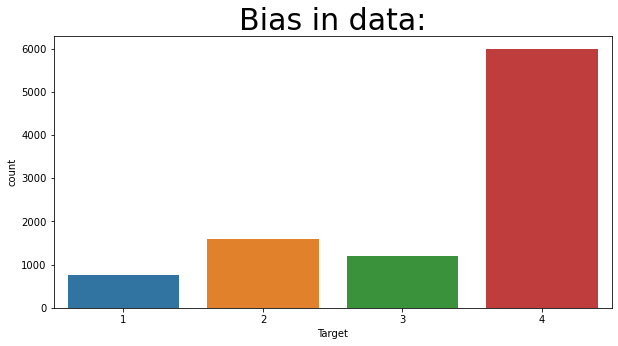

In [34]:
plt.figure(figsize=(10,5))
plt.title("Bias in data:", size=30)
sns.countplot(x="Target", data=iq_train)
plt.show()

**Observation: Yes, the data is biased and we can clearly see that there data is much inclined toward the value 4**

## Task 4: Check whether all members of the house have the same poverty level 

In [35]:
print("No. of unique values in 'idhogar' :", (iq_train.idhogar.nunique()))
print("No. of total rows in 'train' :", (iq_train.shape[0]))

No. of unique values in 'idhogar' : 2988
No. of total rows in 'train' : 9557


In [36]:
not_equal = (iq_train.groupby("idhogar")['Target'].nunique()>1).index
print('There are {} households where the family members do not all have the same poverty level.'.format(len(not_equal)))
print(not_equal)

There are 2988 households where the family members do not all have the same poverty level.
Index(['001ff74ca', '003123ec2', '004616164', '004983866', '005905417',
       '006031de3', '006555fe2', '00693f597', '006b64543', '00941f1f4',
       ...
       'ff250fd6c', 'ff31b984b', 'ff38ddef1', 'ff6d16fd0', 'ff703eed4',
       'ff9343a35', 'ff9d5ab17', 'ffae4a097', 'ffe90d46f', 'fff7d6be1'],
      dtype='object', name='idhogar', length=2988)


## Task 5: Check if there is a house without a family head

In [37]:
no_head = (iq_train.groupby(['idhogar'])['parentesco1'].sum() == 0).index
print("Number of house Identifier without a family head :", len(no_head))
print(no_head)

Number of house Identifier without a family head : 2988
Index(['001ff74ca', '003123ec2', '004616164', '004983866', '005905417',
       '006031de3', '006555fe2', '00693f597', '006b64543', '00941f1f4',
       ...
       'ff250fd6c', 'ff31b984b', 'ff38ddef1', 'ff6d16fd0', 'ff703eed4',
       'ff9343a35', 'ff9d5ab17', 'ffae4a097', 'ffe90d46f', 'fff7d6be1'],
      dtype='object', name='idhogar', length=2988)


## Task 6: Set poverty level of the members and the head of the house within a family

In [38]:
sp = 0
nh = 0

for idhogar in iq_train['idhogar'].unique():
    if len(iq_train[iq_train['idhogar'] == idhogar]['Target'].unique()) == 1:
        sp += 1
    if (iq_train[iq_train['idhogar'] == idhogar]['parentesco1'] == 0).all():
        nh += 1

In [39]:
print('Family with the same poverty level:', sp)
print('Family with the diff poverty level:', len(iq_train['idhogar'].unique()) - sp)
print('House without a Family head', nh)

Family with the same poverty level: 2903
Family with the diff poverty level: 85
House without a Family head 15


In [40]:
target_mean = iq_train.groupby('idhogar')['Target'].mean().astype('int64')\
                    .reset_index()\
                    .rename(columns={'Target':'Target_mean'})

iq_train = iq_train.merge(target_mean, how='left', on='idhogar')
iq_train.Target = iq_train.Target_mean
iq_train.drop('Target_mean', axis=1, inplace=True)
iq_train

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,0.0,0,1,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,0.0,0,8,0,1,1,0,0.0,0,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,80000.0,0,6,0,1,1,0,0.0,0,2,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,80000.0,0,6,0,1,1,0,0.0,0,2,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,80000.0,0,6,0,1,1,0,0.0,0,2,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,80000.0,0,6,0,1,1,0,0.0,0,2,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


## Task 7: Count how many null values are existing in columns 

**Completed in EDA**

## Task 8: Remove null value rows of the target variable

**Completed in EDA**

In [41]:
print("Null values in Target Variable:", iq_train["Target"].isna().sum())

Null values in Target Variable: 0


## Task 9: Predict the accuracy using random forest classifier

In [42]:
#Befor moving ahead with Random forest let's delete idhogar column
print(iq_train.shape)
iq_train.drop(['idhogar'], axis=1, inplace=True)
print(iq_train.shape)
print("----------------------------------------------------------------------------------------------------------")
print(iq_test.shape)
iq_test.drop(['idhogar'], axis=1, inplace=True)
print(iq_test.shape)

(9557, 142)
(9557, 141)
----------------------------------------------------------------------------------------------------------
(23856, 141)
(23856, 140)


In [43]:
X=iq_train.drop(columns=["Target"])
y=iq_train["Target"]

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
RFclass=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RFclass.fit(X,y)

RandomForestClassifier(n_estimators=10)

In [45]:
y_pred = RFclass.predict(x_test)
print(y_pred)

[4 4 4 ... 4 4 2]


In [46]:
print(RFclass)
print("\nAccuracy:",accuracy_score(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\n\nClassification Report:\n",classification_report(y_test,y_pred))

RandomForestClassifier(n_estimators=10)

Accuracy: 0.9989539748953975

Confusion Matrix:
 [[ 168    0    0    0]
 [   0  323    0    1]
 [   0    0  221    1]
 [   0    0    0 1198]]


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       168
           2       1.00      1.00      1.00       324
           3       1.00      1.00      1.00       222
           4       1.00      1.00      1.00      1198

    accuracy                           1.00      1912
   macro avg       1.00      1.00      1.00      1912
weighted avg       1.00      1.00      1.00      1912



## Task 10: Check the accuracy using random forest with cross validation 

In [48]:
# Using cross validation
from sklearn.model_selection import cross_val_score
crossval = cross_val_score(RFclass, X, y, scoring='accuracy')
print(np.mean(crossval)*100,"\t", min(crossval)*100,"\t", max(crossval)*100)
print("-------------------------------------------------------------------------------------------------------------------")
print(crossval)
print("-------------------------------------------------------------------------------------------------------------------")
print(crossval.mean()*100)

56.79467474147689 	 42.80481423338566 	 64.27824267782427
-------------------------------------------------------------------------------------------------------------------
[0.62604603 0.64278243 0.62637363 0.42804814 0.51648352]
-------------------------------------------------------------------------------------------------------------------
56.79467474147689
